In [1]:
# importing the required modules
from sklearn import datasets
import pandas as pd
import numpy as np

# loading the iris dataset
dataset = datasets.load_iris()

# converting the data to DataFrame
data = pd.DataFrame(data= np.c_[dataset['data'], dataset['target']],
                     columns= dataset['feature_names'] + ['target'])

# printing the few rows
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [2]:
# splitting the dataset into input and output
Input = data.drop('target', axis=1)
Output =data['target']

In [3]:
# importing the module
from sklearn.model_selection import train_test_split

# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size=0.30)

In [5]:
# importing the lightgbm module
import lightgbm as lgb

# initializing the model
model_Clf = lgb.LGBMClassifier()

# training the model
model_Clf.fit(X_train, y_train)

LGBMClassifier()

In [6]:
# making prediction 
clf_pred = model_Clf.predict(X_test)

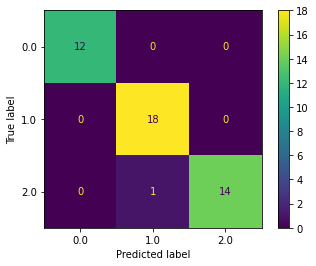

In [7]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix plotting
cm = confusion_matrix(y_test, clf_pred, labels=model_Clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_Clf.classes_)
disp.plot()
plt.show()

In [8]:
# importing the module
from sklearn.metrics import accuracy_score

# printing
print("The accuracy is: ", accuracy_score(y_test, clf_pred))

The accuracy is:  0.9777777777777777


In [36]:
# importing dataset 
data = pd.read_csv('house.csv')

# heading of the dataset
data.head()

,number_of_rooms,floor,area,latitude,longitude,price
0,1,1,58.0,38.585834,68.793715,330000
1,1,14,68.0,38.522254,68.749918,340000
2,3,8,50.0,NaN,NaN,700000
3,3,14,84.0,38.520835,68.747908,700000
4,3,3,83.0,38.564374,68.739419,415000


In [37]:
data.dropna(inplace=True)

In [38]:
# input and output variables
Input = data.drop('price', axis=1)
Output = data.price

In [50]:
# importing the module
from sklearn.model_selection import train_test_split

# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size=0.25)

In [51]:
import lightgbm as lgb

In [52]:
# initialzing the model
model_reg = lgb.LGBMRegressor()

# train the model
model_reg.fit(X_train,y_train)

LGBMRegressor()

In [53]:
# Making predictions
reg_pred = model_reg.predict(X_test)


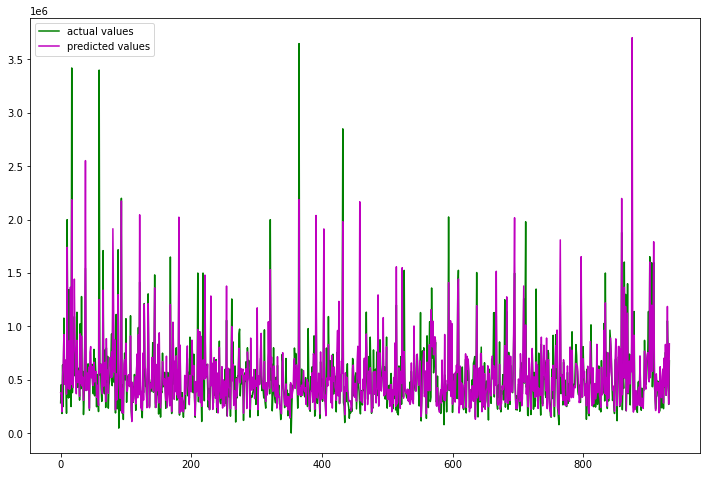

In [54]:
# importing the module
import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(12, 8))

# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")

# predicted values
plt.plot([i for i in range(len(y_test))],reg_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [55]:
#importing the r-square score
from sklearn.metrics import r2_score

# calculating the r score 
print('R score is :', r2_score(y_test, reg_pred))

R score is : 0.6219840722617338


In [21]:
# importing the module
import xgboost as xgb

# xgboost regressor
model = xgb.XGBRegressor()

# training the model
model.fit(X_train,y_train)

# making predictions
xgboost_pred = model.predict(X_test)

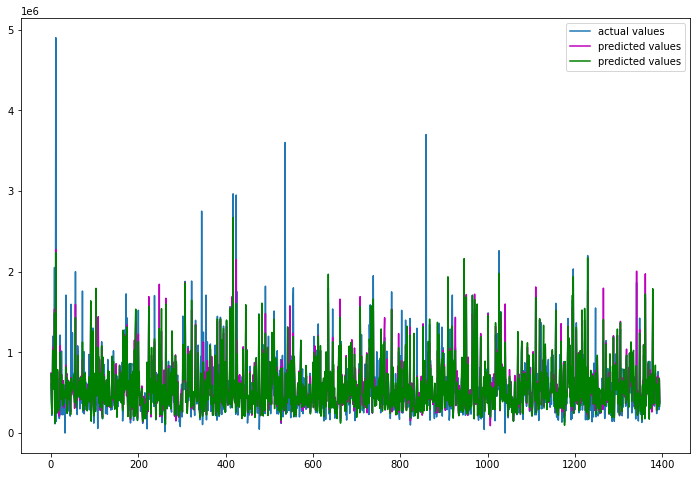

In [23]:
# importing the module
import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(12, 8))

# acutal values
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")

# predicted values
plt.plot([i for i in range(len(y_test))],reg_pred, c='m',label="predicted values")

# predicted values
plt.plot([i for i in range(len(y_test))],xgboost_pred, c='g',label="predicted values")
plt.legend()
plt.show()

In [24]:
# calculating the r score 
print('R score of lightGBM :', r2_score(y_test, reg_pred))
print('R score of XGBoost :', r2_score(y_test, xgboost_pred))

R score of lightGBM : 0.6274307366384565
R score of XGBoost : 0.6130516850347714


In [57]:
# importing the regressor
from sklearn.ensemble import GradientBoostingRegressor

# training the model with 2 iterations 
GB_rgsr=GradientBoostingRegressor()

# training the model
GB_rgsr.fit(X_train,y_train)

# making the predictions
GB_predict=GB_rgsr.predict(X_test)

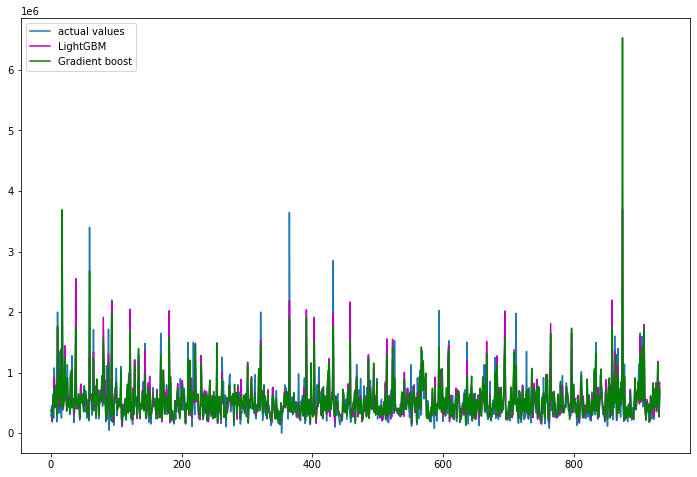

In [58]:
# figure size
plt.figure(figsize=(12, 8))

# acutal values
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")

# predicted values
plt.plot([i for i in range(len(y_test))],reg_pred, c='m',label="LightGBM")

# predicted values
plt.plot([i for i in range(len(y_test))],GB_predict, c='g',label="Gradient boost")
plt.legend()
plt.show()

In [59]:
# calculating the r score 
print('R score of lightGBM :', r2_score(y_test, reg_pred))
print('R score of Gradient boost :', r2_score(y_test, GB_predict))

R score of lightGBM : 0.6219840722617338
R score of Gradient boost : 0.5154967598978722


In [61]:
# importing ada boost regressor
from sklearn.ensemble import AdaBoostRegressor

# Create adaboot 
Ada_regressor = AdaBoostRegressor()

# training the ada boost regressor
AdaBoost = Ada_regressor.fit(X_train, y_train)

#Predict price 
AdaBoost_pred = AdaBoost.predict(X_test)

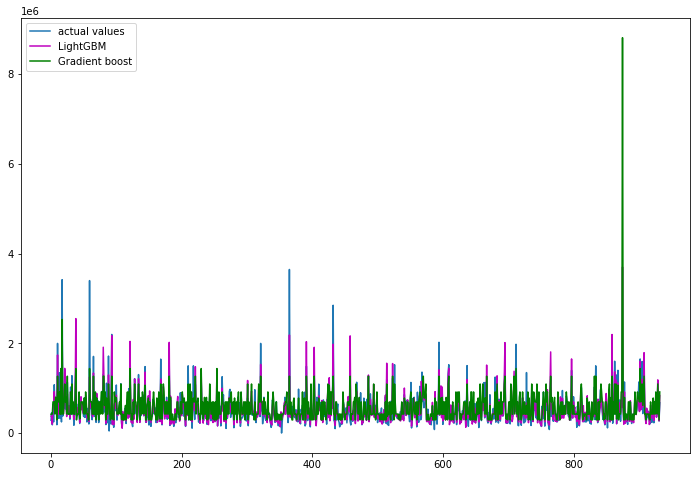

In [62]:
# figure size
plt.figure(figsize=(12, 8))

# acutal values
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")

# predicted values
plt.plot([i for i in range(len(y_test))],reg_pred, c='m',label="LightGBM")

# predicted values
plt.plot([i for i in range(len(y_test))],AdaBoost_pred, c='g',label="Gradient boost")
plt.legend()
plt.show()

In [63]:
# calculating the r score 
print('R score of lightGBM :', r2_score(y_test, reg_pred))
print('R score of Gradient boost :', r2_score(y_test, AdaBoost_pred))

R score of lightGBM : 0.6219840722617338
R score of Gradient boost : 0.09390657749552467


In [64]:
# importing all the necessary modules
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from numpy import arange

In [68]:
# function for the validation of model
def evaluate_model(model, Input, Ouput):
    
    # defining the method of validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
    
    
    # validating the model based on the accurasy score
    r_square = cross_val_score(model, Input, Ouput, scoring='r2', cv=cv, n_jobs=-1)
    
#     returning the accuracy score
    return r_square

In [66]:
# fuction to create models
def build_models():
    
#     dic of models
    models = dict()
    
    # number of decision stumps
    decision_stump= [10, 50, 100, 500, 1000]
        
#    using for loop to iterate though trees
    for i in decision_stump:
        
#         building model with specified trees
        models[str(i)] = lgb.LGBMRegressor(n_estimators=i)
    
#     returning the model
    return models

In [69]:
# calling the build_models function
models = build_models()

# creating list
results, names = list(), list()

# using for loop to iterate thoug the models
for name, model in models.items():
    
    # calling the validation function
    R_square = evaluate_model(model, Input, Output)
    
    
    # appending the accuray socres in results
    results.append(R_square)
    names.append(name)
    
    
    # printing the accuracy score
    print('Iterations (%s)---R-square( %.5f)' % (name, mean(R_square)))

/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Iterations (10)---R-square( 0.45229)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Iterations (50)---R-square( 0.52924)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Iterations (100)---R-square( 0.51087)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Iterations (500)---R-square( 0.40014)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Iterations (1000)---R-square( 0.35591)


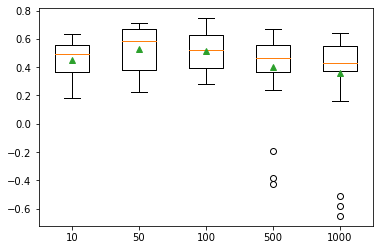

In [70]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)

# showing the plot
plt.show()

In [73]:
# creating the function 
def build_models():
    
#     creating dic of models
    models = dict()
    
    # explore features numbers from 1-5
    for i in range(1,6):
        
#         appending the models
        models[str(i)] = lgb.LGBMRegressor(max_features=i)
    
#     returining the models
    return models

In [74]:
# calling the function
models = build_models()

# creating the list
results, names = list(), list()

# for loop to iterate through the models
for name, model in models.items():
    
    
    # calling the evaluting function
    R_square = evaluate_model(model, Input, Output)
    
#     storing the accurcy
    results.append(R_square)
    names.append(name)
    
#     printing
    print('---->Features(%s)---R_square( %.5f)' % (name, mean(R_square)))

/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


---->Features(1)---R_square( 0.51406)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


---->Features(2)---R_square( 0.50941)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


---->Features(3)---R_square( 0.50598)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


---->Features(4)---R_square( 0.50896)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


---->Features(5)---R_square( 0.51173)
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGB

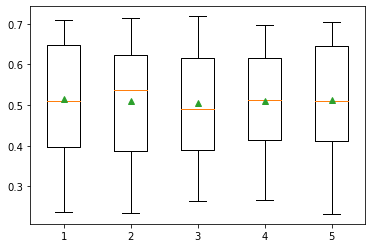

In [75]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)

# showing the plot
plt.show()

In [76]:
# creating the function
def build_models():
    
#     dic of models
    models = dict()
    
#     exploring different sample values
    for i in arange(0.1, 1.1, 0.1):
        
#         key value
        k = '%.1f' % i
    
#     appending the model
        models[k] = lgb.LGBMRegressor(subsample=i)
    return models

In [77]:
# calling the function
models = build_models()
# creating the list
results, names = list(), list()
# for loop to iterate through the models
for name, model in models.items():
    
    
    # calling the evaluting function
    R_square = evaluate_model(model, Input, Output)
    
#     storing the accurcy
    results.append(R_square)
    names.append(name)
    
#     printing
    print('Samples(%s)---R_square( %.5f)' % (name, mean(R_square)))

/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Samples(0.1)---R_square( 0.50778)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Samples(0.2)---R_square( 0.51058)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Samples(0.3)---R_square( 0.51101)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Samples(0.4)---R_square( 0.50638)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Samples(0.5)---R_square( 0.50609)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Samples(0.6)---R_square( 0.50589)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Samples(0.7)---R_square( 0.51091)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Samples(0.8)---R_square( 0.50647)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Samples(0.9)---R_square( 0.51003)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Samples(1.0)---R_square( 0.50533)


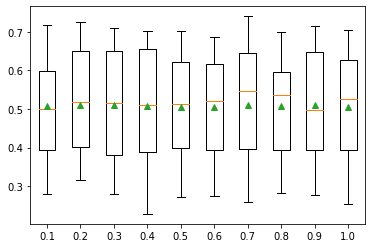

In [78]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)

# showing the plot
plt.show()

In [81]:
# creating function
def build_models():
    
#     creating dic of models
    models = dict()
    
#     different learning rates
    for i in [0.0001, 0.001, 0.01, 0.1, 1.0]:
        
#         key value
        k = '%.4f' % i
    
#     appending the models
        models[k] = lgb.LGBMRegressor(learning_rate=i)
    return models

In [82]:
# calling the function
models = build_models()
# creating the list
results, names = list(), list()
# for loop to iterate through the models
for name, model in models.items():
    
    
    # calling the evaluting function
    R_square = evaluate_model(model, Input, Output)
    
#     storing the accurcy
    results.append(R_square)
    names.append(name)
    
#     printing
    print('Learning Rate(%s)---R Square( %.5f)' % (name, mean(R_square)))

/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Learning Rate(0.0001)---R Square( 0.00854)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Learning Rate(0.0010)---R Square( 0.09344)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Learning Rate(0.0100)---R Square( 0.44661)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Learning Rate(0.1000)---R Square( 0.50150)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Learning Rate(1.0000)---R Square( 0.26148)


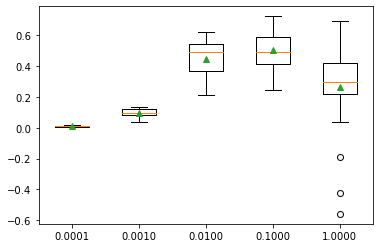

In [83]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)

# showing the plot
plt.show()

In [84]:
# building function for the model
def build_models():
    
#     creating dic of models
    models = dict()
    
#     specifying the depth of trees
    for i in range(1,12):
        
#         appending the models
        models[str(i)] = lgb.LGBMRegressor(max_depth=i)
        
#   returining the model
    return models

In [85]:
# calling the function
models = build_models()

# creating lists 
results, names = list(), list()

# iterating through the models
for name, model in models.items():
    
    # calling the evalution function
    R_square = evaluate_model(model, Input, Output)
    
    # appending the results
    results.append(R_square)
    names.append(name)
    
#     printing the results
    print('Decision tree depth (%s)---R_square( %.5f)' % (name, mean(R_square)))

/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Decision tree depth (1)---R_square( 0.50951)
Decision tree depth (2)---R_square( 0.51720)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Decision tree depth (3)---R_square( 0.51899)
Decision tree depth (4)---R_square( 0.51981)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Decision tree depth (5)---R_square( 0.52067)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Decision tree depth (6)---R_square( 0.51417)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Decision tree depth (7)---R_square( 0.50711)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Decision tree depth (8)---R_square( 0.50787)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Decision tree depth (9)---R_square( 0.51169)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Decision tree depth (10)---R_square( 0.50990)


/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Decision tree depth (11)---R_square( 0.51357)


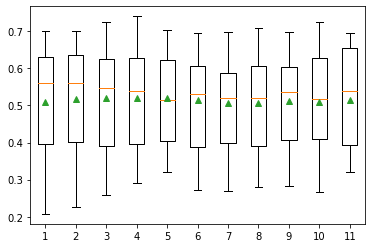

In [86]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)

# showing the plot
plt.show()

In [87]:
# defiing the model
model = lgb.LGBMRegressor()


# creating a dict of grids
grid = dict()

# values for iteration
grid['n_estimators'] = [10, 50, 100, 500]

# values for learning rate
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# values for the sampel
grid['subsample'] = [0.5, 0.7, 1.0]

# values for teh depth of tree
grid['max_depth'] = [3, 4, 5]

In [88]:
# defining the cv
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)


# applying the gridsearchcv method
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='r2')

# storing the values
grid_result = grid_search.fit(Input, Output)


# printing the best parameters
print("Accuracy score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/uca/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Accuracy score: 0.532401 using {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.5}
